In [3]:
#Importing Libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

UNDERSTANDING THE DATA

In [5]:
df = pd.read_csv('events.csv')

In [7]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486988 entries, 0 to 486987
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     486988 non-null  object 
 1   event_type     486988 non-null  object 
 2   product_id     486988 non-null  int64  
 3   category_id    486988 non-null  int64  
 4   category_code  347057 non-null  object 
 5   brand          365935 non-null  object 
 6   price          486987 non-null  float64
 7   user_id        486987 non-null  float64
 8   user_session   486853 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 33.4+ MB


In [11]:
df.describe()
df.shape
print(df.shape)
print(df.describe())

(486988, 9)
         product_id   category_id          price       user_id
count  4.869880e+05  4.869880e+05  486987.000000  4.869870e+05
mean   1.781181e+06  2.144425e+18     123.310120  1.515916e+18
std    1.418306e+06  6.896637e+14     309.121684  2.732295e+07
min    1.020000e+02  2.144416e+18       0.220000  1.515916e+18
25%    6.500730e+05  2.144416e+18      23.570000  1.515916e+18
50%    1.306863e+06  2.144416e+18      56.920000  1.515916e+18
75%    3.606492e+06  2.144416e+18     142.220000  1.515916e+18
max    4.183880e+06  2.227847e+18   64771.060000  1.515916e+18


CONVERTING THE DATA FOR BETTER ANALYSIS-  CAN BE SEEN FURTHER AHEAD.

In [15]:
print(df.columns)
df["event_time"] = pd.to_datetime(df["event_time"])

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')


CLEANING THE DATA

In [24]:
#Missing Values
df.isna().sum()
df_duplicates = df.loc[df.duplicated(subset = ["event_type"])]
print(df_duplicates)

df.dropna()
print(df)

df.drop_duplicates()
print(df)



                      event_time event_type  product_id          category_id  \
1      2020-09-24 11:57:26+00:00       view      139905  2144415926932472027   
2      2020-09-24 11:57:27+00:00       view      215454  2144415927158964449   
3      2020-09-24 11:57:33+00:00       view      635807  2144415923107266682   
4      2020-09-24 11:57:36+00:00       view     3658723  2144415921169498184   
5      2020-09-24 11:57:59+00:00       view      664325  2144415951611757447   
...                          ...        ...         ...                  ...   
486983 2020-12-22 17:23:22+00:00       view     4079420  2144415922427789416   
486984 2020-12-22 17:23:24+00:00       view      359224  2144415926966026460   
486985 2020-12-22 17:23:30+00:00       view      902556  2144415928727634188   
486986 2020-12-22 17:23:32+00:00       view      847338  2144415922587172973   
486987 2020-12-22 17:23:33+00:00       view     4155385  2144415922427789416   

                          category_code

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486988 entries, 0 to 486987
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     486988 non-null  datetime64[ns, UTC]
 1   event_type     486988 non-null  object             
 2   product_id     486988 non-null  int64              
 3   category_id    486988 non-null  int64              
 4   category_code  347057 non-null  object             
 5   brand          365935 non-null  object             
 6   price          486987 non-null  float64            
 7   user_id        486987 non-null  float64            
 8   user_session   486853 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(4)
memory usage: 33.4+ MB


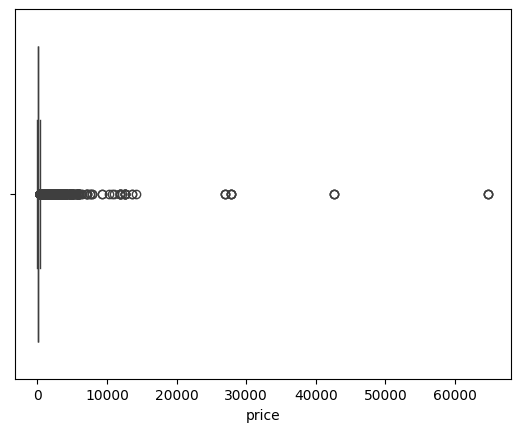

In [26]:
#Outliers
#analysing the data deviating from the actual data
sns.boxplot(x=df['price'])
plt.show()


UNDERSTANDING FEATURE RELATIONS WITH ONE ANOTHER.

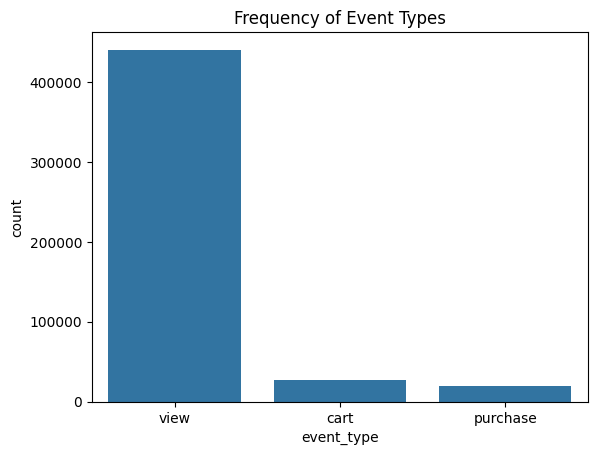

In [27]:
#Visualising Insights
#for event_type
sns.countplot(data=df, x='event_type')
plt.title('Frequency of Event Types')
plt.show()

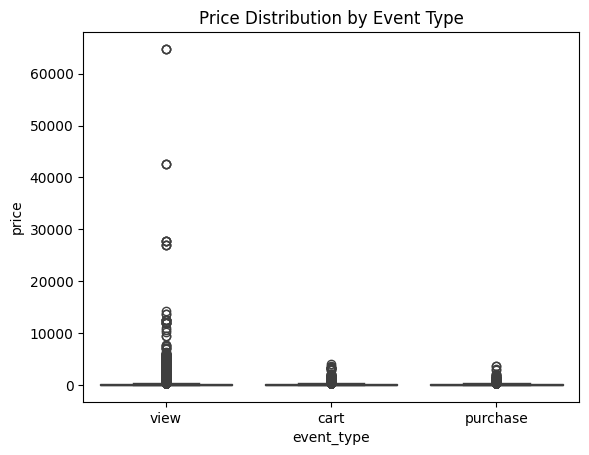

In [30]:
sns.boxplot(data=df, x='event_type', y='price')
plt.title('Price Distribution by Event Type')
plt.show()

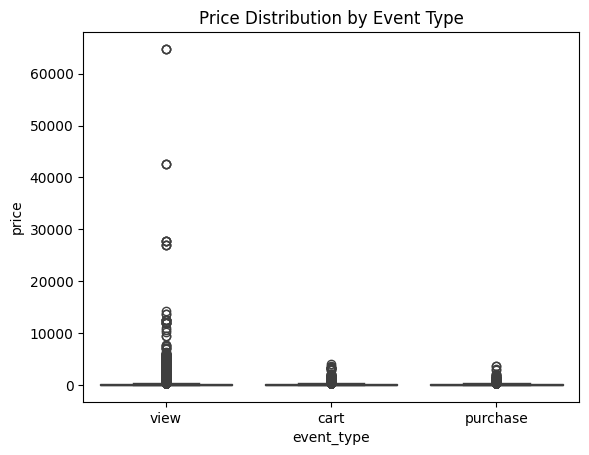

In [32]:
#variation of event type w.r.t price
sns.boxplot(data=df, x='event_type', y='price')
plt.title('Price Distribution by Event Type')
plt.show()


In [35]:
#users per event
user_event_type_count = df.groupby('event_type')['user_id'].unique()
print(user_event_type_count)


event_type
cart        [1.5159156255193905e+18, 1.5159156255193925e+1...
purchase    [1.5159156255193905e+18, 1.5159156255135744e+1...
view        [1.5159156255193882e+18, 1.5159156255193805e+1...
Name: user_id, dtype: object


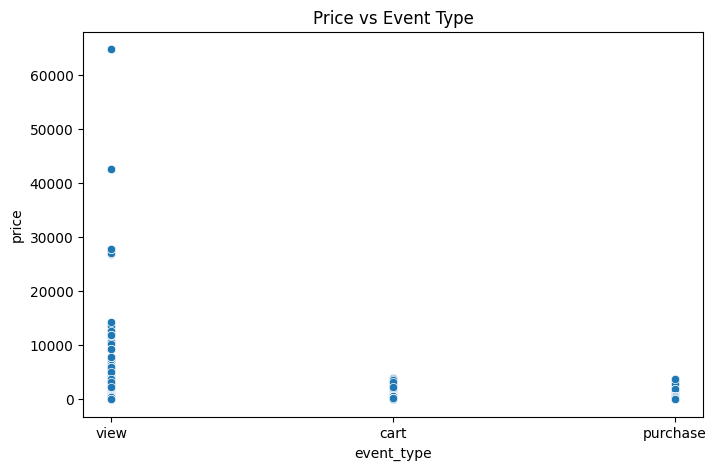

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='event_type', y='price')
plt.title('Price vs Event Type')
plt.show()


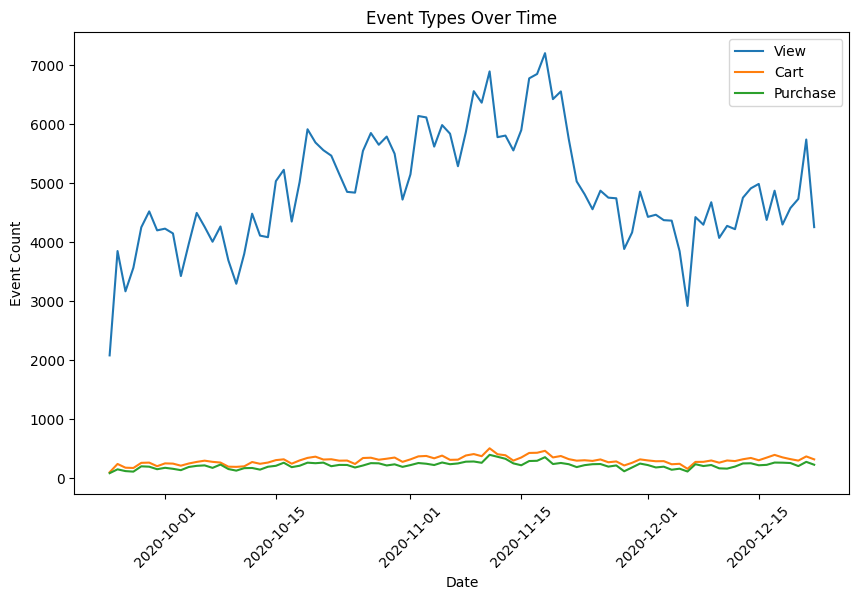

In [39]:
#analysing the attributes of event-type and its context
df['event_date'] = df['event_time'].dt.date
event_time_df = df.groupby(['event_date', 'event_type']).size().unstack().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=event_time_df, x='event_date', y='view', label='View')
sns.lineplot(data=event_time_df, x='event_date', y='cart', label='Cart')
sns.lineplot(data=event_time_df, x='event_date', y='purchase', label='Purchase')
plt.title('Event Types Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [49]:
#defining the churn with RFM metrics to predict the mentioned results
df_purchase = df[df['event_type'] == 'purchase']

recency = df_purchase.groupby('user_id')['event_time'].max().reset_index()
recency['recency'] = (df['event_time'].max() - recency['event_time']).dt.days

frequency = df_purchase.groupby('user_id').size().reset_index(name='frequency')

monetary = df_purchase.groupby('user_id')['price'].sum().reset_index()
monetary = monetary.rename(columns={'price': 'monetary'})

rfm = recency.merge(frequency, on='user_id', how='left')
rfm = rfm.merge(monetary, on='user_id', how='left')

rfm = rfm.fillna({'frequency': 0, 'monetary': 0, 'recency': rfm['recency'].max()})

churn_threshold = 30
rfm['churn'] = rfm['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

print(rfm.head())


               user_id                event_time  recency  frequency  \
0  1515915625353286099 2020-10-03 11:23:44+00:00      148          1   
1  1515915625353457259 2020-09-29 05:52:55+00:00      152          1   
2  1515915625353534622 2020-10-06 10:29:25+00:00      145          3   
3  1515915625353561691 2020-11-25 09:24:42+00:00       95          2   
4  1515915625353900095 2020-10-15 05:09:35+00:00      136          2   

   monetary  churn  
0    119.03      1  
1     55.16      1  
2     57.15      1  
3    345.72      1  
4     57.85      1  


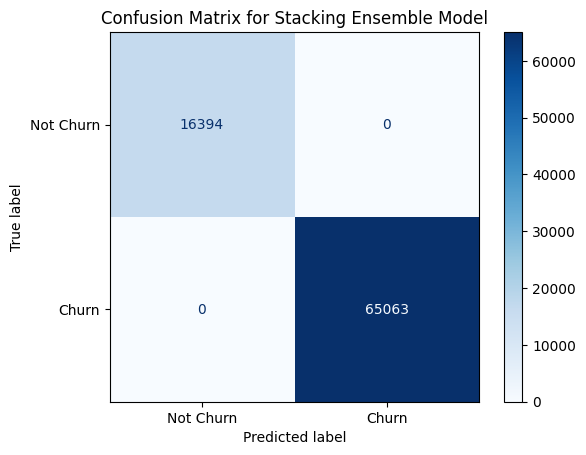

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16394
           1       1.00      1.00      1.00     65063

    accuracy                           1.00     81457
   macro avg       1.00      1.00      1.00     81457
weighted avg       1.00      1.00      1.00     81457



In [50]:
#Model training, testing, evaluating and prediction analysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


df = pd.read_csv('events.csv')
df["event_time"] = pd.to_datetime(df["event_time"])


current_date = df['event_time'].max()
df['last_activity'] = (current_date - df['event_time']).dt.days
df['churn'] = (df['last_activity'] > 30).astype(int)


rfm = df.groupby('user_id').agg(
    recency=('last_activity', 'min'),
    frequency=('user_id', 'count'),
    monetary=('price', 'sum')
).reset_index()


rfm['churn'] = (rfm['recency'] > 30).astype(int)


rfm = rfm.apply(pd.to_numeric, errors='coerce')


rfm = rfm.dropna()


X = rfm.drop(columns='churn')
y = rfm['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_learners = [
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]


meta_model = LogisticRegression()


stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)


stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Stacking Ensemble Model")
plt.show()


print(classification_report(y_test, y_pred))


BUSINESS RECOMENDATIONS

In [51]:
def generate_recommendations(user_data):
    recommendations = []

    if user_data['churn'] == 1:
        recommendations.append("Send personalized offers to encourage purchase.")
        if user_data['monetary'] < 50:
            recommendations.append("Offer a discount on their next purchase.")
        if user_data['frequency'] < 3:
            recommendations.append("Increase engagement through targeted emails.")
    else:
        recommendations.append("Thank the user for their loyalty and offer exclusive deals.")
        if user_data['recency'] > 30:
            recommendations.append("Encourage them to explore new products.")

    return recommendations

rfm['recommendations'] = rfm.apply(generate_recommendations, axis=1)

for index, row in rfm.iterrows():
    print(f"User ID: {row['user_id']}")
    print("Recommendations:")
    for rec in row['recommendations']:
        print(f"- {rec}")
    print("\n")

Streaming output truncated to the last 5000 lines.
User ID: 1515915625610864010
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610864160
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610864386
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610864624
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610864682
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610864693
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610864794
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610864919
Recommendations:
- Thank the user for their loyalty and offer exclusive deals.


User ID: 1515915625610865152
Recommendations:
- Thank the user for th